In [1]:
import sys
import copy
sys.path.insert(0, "..")
from classes.calculators.lennardjones import LennardJones
from classes.atoms import Atom_Collection, Atom
from classes.optimizers.metropol import Metropol
from classes.optimizers.random_struct_search import Random_Searcher
from classes.descriptors import ExtremeNeighborCount
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np
plt.rc('animation', html='jshtml')

In [2]:
pos_flat = np.loadtxt('lj10clusters.txt')
positions = pos_flat.reshape(-1,pos_flat.shape[1]//2,2)
atom_cols = [Atom_Collection([Atom(position=pos, size=20) for pos in poses]) for poses in positions]
neighboring = ExtremeNeighborCount(color="C4")

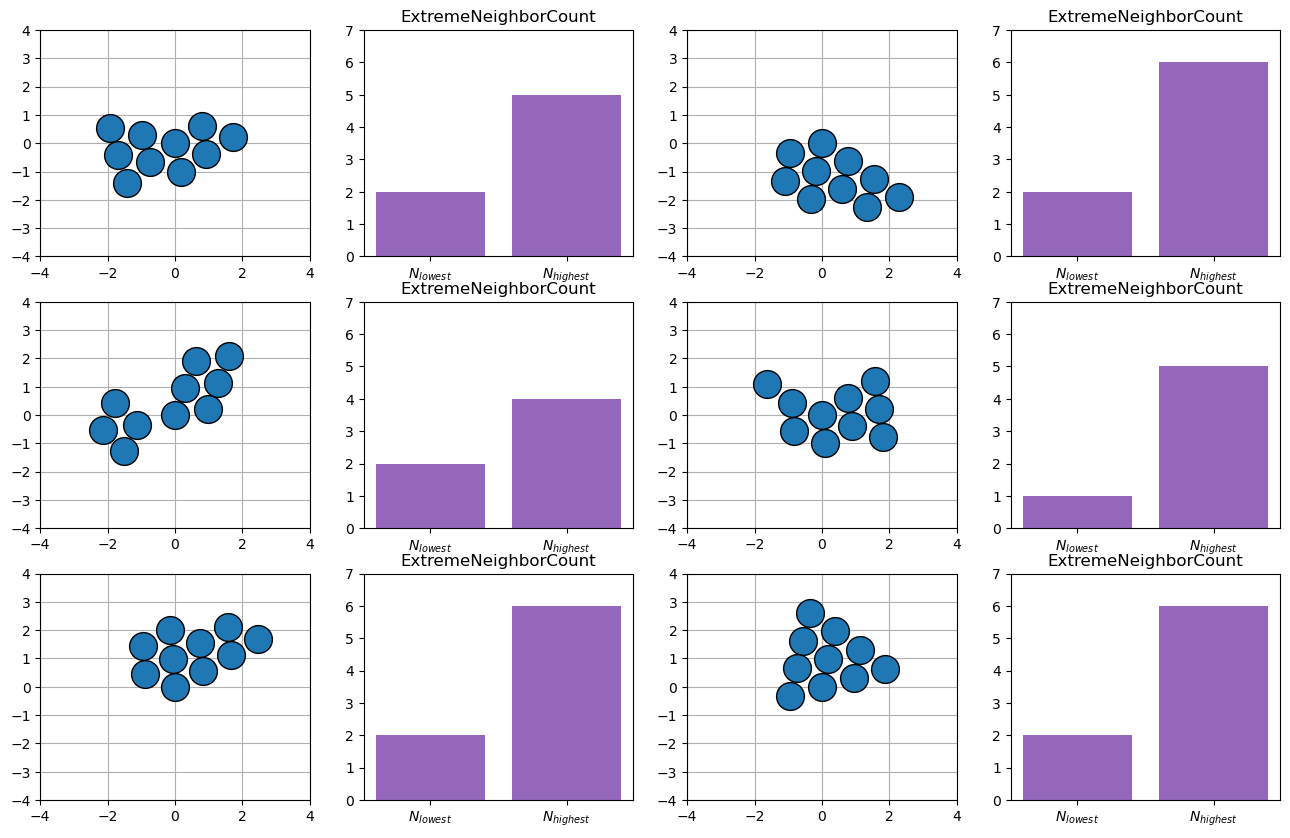

In [3]:
fig, axs = plt.subplots(3,4, figsize=(16,10))
j = 0
for i in [0, 2]:
    for ax1, ax2 in zip(axs[:,i], axs[:,i+1]):
        ax1.set_xlim([-4,4])
        ax1.set_ylim([-4,4])
        ax1.grid()
        neighboring.plot(atom_col=atom_cols[j], ax=ax2)
        atom_cols[j].plot(ax=ax1)
        j+=1

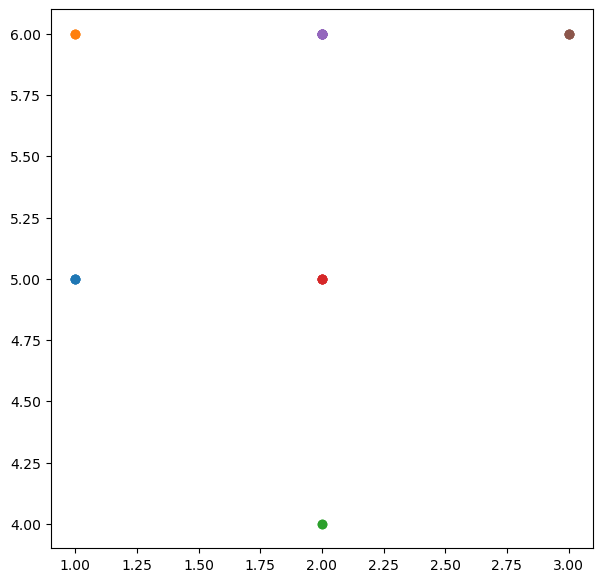

In [9]:
fig, ax = plt.subplots(figsize=(7,7))
descriptors = np.array([neighboring.get_descriptor(atom_col=atom_col) for atom_col in atom_cols])
desc_ints = [2.0,4.0,5.0,6.0]
atom_clusters = {}
i = 0
for desc_intx in [1,2,3]:
    for desc_inty in [4,5,6]:
        atom_cols_cluster = []
        indices_x = np.argwhere(descriptors[:,0] == desc_intx)#[:,0]
        indices_y = np.argwhere(descriptors[:,1] == desc_inty)
        for index_x in indices_x:
            if index_x in indices_y:
                atom_cols_cluster.append(atom_cols[index_x[0]])
                ax.plot(descriptors[:,0][index_x], descriptors[:,1][index_x], 'o', c=f"C{i}")
        if len(atom_cols_cluster) > 0:
            atom_clusters[i] = atom_cols_cluster
            i+=1

(-5.0, 55.0)

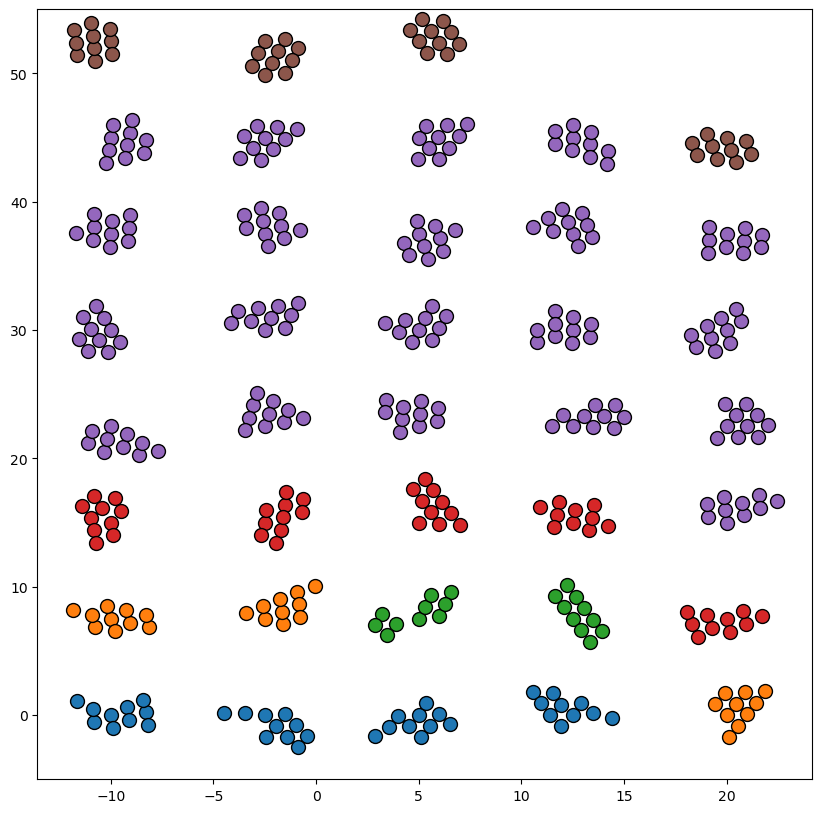

In [13]:
fig, ax = plt.subplots(figsize=(10, 10))

i = 0
disp_vector = np.array([-10.0, 0.0])
for cluster in atom_clusters:
    for atom_col in atom_clusters[cluster]:
        atom_col.set_sizes([10.0 for i in range(len(atom_col))])
        atom_col.reset_plot_axes()
        atom_col.set_colors([f"C{cluster}" for i in range(len(atom_col))])
        for atom in atom_col:
            #pass
            atom.move(disp_vector)
        #atom_col.get_positions()
        atom_col.plot(ax=ax)
        for atom in atom_col:
            #pass
            atom.move(-disp_vector)
        i+=1
        if i % 5 == 0:
            #print(i)
            disp_vector[1]+=7.5
            disp_vector[0]=-10.0
        else:
            disp_vector[0]+=7.5
ax.set_ylim(-5.0,55)